# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#use datasets
weather=pd.read_csv("weather_data.csv")
weather

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No
5,Sunny,Mild,High,Weak,No
6,Sunny,Cool,Normal,Weak,Yes
7,Rain,Mild,Normal,Weak,Yes
8,Sunny,Mild,Normal,Strong,Yes
9,Overcast,Mild,High,Strong,Yes


# Data Preprocessing

In [3]:
weather.shape

(14, 5)

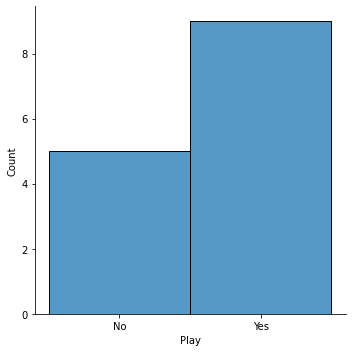

In [4]:
sns.displot(weather["Play"])
plt.show()

In [5]:
dataset=pd.DataFrame(weather.Play)
dataset

,Play
0,No
1,No
2,Yes
3,Yes
4,No
5,No
6,Yes
7,Yes
8,Yes
9,Yes


In [6]:
x=weather[['Outlook','Temperature','Humidity','Wind']]
x.head()

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Cool,Normal,Weak
4,Rain,Cool,Normal,Strong


In [7]:
y=weather['Play']
y

0      No
1      No
2     Yes
3     Yes
4      No
5      No
6     Yes
7     Yes
8     Yes
9     Yes
10    Yes
11     No
12    Yes
13    Yes
Name: Play, dtype: object

In [8]:
X=x.iloc[:,:]
X

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Cool,Normal,Weak
4,Rain,Cool,Normal,Strong
5,Sunny,Mild,High,Weak
6,Sunny,Cool,Normal,Weak
7,Rain,Mild,Normal,Weak
8,Sunny,Mild,Normal,Strong
9,Overcast,Mild,High,Strong


In [9]:
Y=weather.Play
Y

0      No
1      No
2     Yes
3     Yes
4      No
5      No
6     Yes
7     Yes
8     Yes
9     Yes
10    Yes
11     No
12    Yes
13    Yes
Name: Play, dtype: object

# Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_X=LabelEncoder()
X=X.apply(LabelEncoder().fit_transform)
X

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,0,1,1
4,1,0,1,0
5,2,2,0,1
6,2,0,1,1
7,1,2,1,1
8,2,2,1,0
9,0,2,0,0


# Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train,Y_train,X_test,Y_test=train_test_split(X,Y,test_size=0.2)

In [12]:
X_train

,Outlook,Temperature,Humidity,Wind
5,2,2,0,1
8,2,2,1,0
2,0,1,0,1
6,2,0,1,1
7,1,2,1,1
4,1,0,1,0
3,1,0,1,1
13,1,2,0,1
0,2,1,0,1
11,1,2,0,0


In [13]:
Y_train

,Outlook,Temperature,Humidity,Wind
10,0,1,1,1
12,0,0,1,0
1,2,1,0,0


# Model Building

## Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

#postPruning 
treemodel=DecisionTreeClassifier()

In [15]:
treemodel = DecisionTreeClassifier(max_depth=2)
treemodel.fit(X, Y)

DecisionTreeClassifier(max_depth=2)

In [16]:
treemodel 

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.5, 'X[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]')]

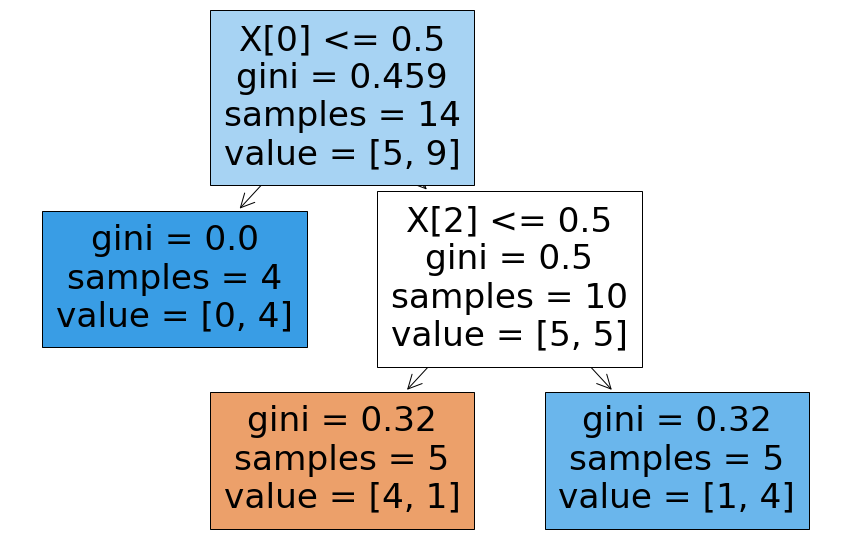

In [17]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [18]:
#prediction
Y_pred=treemodel.predict(X)
Y_pred

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No'], dtype=object)

# Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score,classification_report


In [20]:
score=accuracy_score(Y_pred,Y)
print(score)

0.8571428571428571


In [21]:
print(classification_report(Y_pred,Y))

              precision    recall  f1-score   support

          No       0.80      0.80      0.80         5
         Yes       0.89      0.89      0.89         9

    accuracy                           0.86        14
   macro avg       0.84      0.84      0.84        14
weighted avg       0.86      0.86      0.86        14



In [22]:
#Pre-Pruning
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2'],
    #'ccp_alpha':[1,2,3,4,5,6,7]
}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [25]:
cv.fit(X,Y)

c:\users\anush\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\anush\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\anush\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\users\anush\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py", l

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [26]:
Y_test

10    Yes
12    Yes
1      No
Name: Play, dtype: object

In [27]:
Y_pred

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No'], dtype=object)

In [28]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'random'}

In [29]:
y_pred=cv.predict(X)

## Precision and Accuracy

In [30]:
from sklearn.metrics import accuracy_score,classification_report

In [31]:
score=accuracy_score(Y_pred,Y)
score

0.8571428571428571

In [32]:
print(classification_report(Y_pred,Y))

              precision    recall  f1-score   support

          No       0.80      0.80      0.80         5
         Yes       0.89      0.89      0.89         9

    accuracy                           0.86        14
   macro avg       0.84      0.84      0.84        14
weighted avg       0.86      0.86      0.86        14

